In [211]:
import pandas as pd
import numpy as np
import pandas 
import numpy

data = pandas.read_csv('/Users/alinayan/Desktop/u Chicago /semseter2/Time serise/Final Project/cinemaTicket_Ref.csv')


In [213]:
##define data processing function
def duplicate(df, column):
    if len(df[df[column].duplicated()]) ==0:
        print(f'STATUS: There is NO ANY duplicate value in the column of "{column}"')
    else:
        print(f'STATUS: There are {len(df[df[column].duplicated()])} duplicate values in the column of "{column}"')

def null(df,df_name):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in {df_name}')
    else:
        print('STATUS: There is null value in dataframe')
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            count = (len(df)) - (df[column].count())
            temp[column] = f"{count} ({round((count/len(df)), 4)*100}%)"
        print(f'STATUS: Nulls of {df_name} = {temp} of total {len(df)}')

def drop(df, column):
    df2 = df.drop(column, axis=1)
    print(f"STATUS: Columns of {column} were dropped")
    return df2

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def move_front(df, column):
    df = df[ [column] + [ col for col in df.columns if col != column ] ]
    return df

    

In [215]:
##df['date'] = pd.to_datetime(df["date"],errors='coerce')
n_unique_film = data['film_code'].nunique()
n_unique_cinema = data['cinema_code'].nunique()
print(f"number of unique films = {n_unique_film}")
print(f"number of unique cinemas = {n_unique_cinema}")
shape(data,'df')
number_duplicates = len(data[data.duplicated()])
number_duplicates
print(f"STATUS: total duplicated rows = {number_duplicates}")
# data.head()

## drop all duplicated rows
df2 = data.drop_duplicates()
print("STATUS: Dropped duplicates")
null(df2,'df2')

## drop columns with null values(deal with missing data)
df2 = drop(df2, ['occu_perc', 'capacity','month','quarter','day'])
shape(df2,'df2')

duplicate(df2,'film_code')
duplicate(df2,'cinema_code')

cols = ['film_code', 'cinema_code','date']

##create unique indentifier (id)
df2['id'] = df2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df2 = move_front(df2, 'id')

duplicate(df2,'id')
display(df2.head())



number of unique films = 48
number of unique cinemas = 246
STATUS: Dimension of "df" = (142524, 14)
STATUS: total duplicated rows = 106
STATUS: Dropped duplicates
STATUS: There is null value in dataframe
STATUS: Nulls of df2 = {'occu_perc': '123 (0.09%)', 'capacity': '123 (0.09%)'} of total 142418
STATUS: Columns of ['occu_perc', 'capacity', 'month', 'quarter', 'day'] were dropped
STATUS: Dimension of "df2" = (142418, 9)
STATUS: There are 142370 duplicate values in the column of "film_code"
STATUS: There are 142172 duplicate values in the column of "cinema_code"
STATUS: There is NO ANY duplicate value in the column of "id"


,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,ticket_price,ticket_use,date
0,1492_304_2018-05-05,1492,304,3900000,26,0,4,150000.0,26,2018-05-05
1,1492_352_2018-05-05,1492,352,3360000,42,0,5,80000.0,42,2018-05-05
2,1492_489_2018-05-05,1492,489,2560000,32,0,4,80000.0,32,2018-05-05
3,1492_429_2018-05-05,1492,429,1200000,12,0,1,100000.0,12,2018-05-05
4,1492_524_2018-05-05,1492,524,1200000,15,0,3,80000.0,15,2018-05-05


In [216]:
n_unique_film = df2['film_code'].nunique()
n_unique_cinema = df2['cinema_code'].nunique()
print(f"number of unique films = {n_unique_film}")
print(f"number of unique cinemas = {n_unique_cinema}")

number of unique films = 48
number of unique cinemas = 246


In [217]:
##sort the data by date
df2.sort_index(inplace=True)
display(df2)

,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,ticket_price,ticket_use,date
0,1492_304_2018-05-05,1492,304,3900000,26,0,4,150000.0,26,2018-05-05
1,1492_352_2018-05-05,1492,352,3360000,42,0,5,80000.0,42,2018-05-05
2,1492_489_2018-05-05,1492,489,2560000,32,0,4,80000.0,32,2018-05-05
3,1492_429_2018-05-05,1492,429,1200000,12,0,1,100000.0,12,2018-05-05
4,1492_524_2018-05-05,1492,524,1200000,15,0,3,80000.0,15,2018-05-05
...,...,...,...,...,...,...,...,...,...,...
142519,1569_495_2018-11-04,1569,495,1320000,22,0,2,60000.0,22,2018-11-04
142520,1569_474_2018-11-04,1569,474,1200000,15,0,1,80000.0,15,2018-11-04
142521,1569_524_2018-11-04,1569,524,1060000,8,0,3,132500.0,8,2018-11-04
142522,1569_529_2018-11-04,1569,529,600000,5,0,2,120000.0,5,2018-11-04


In [218]:
##Apply log transformation
import numpy as np

df2['total_sales_log'] = np.log1p(df2['total_sales'])  # log(1+x) to avoid log(0)
df2['ticket_price_log'] = np.log1p(df2['ticket_price'])

display(df2)


# Save df2 to CSV
df2.to_csv("df2_transformed.csv", index=False)

# Verify if the file is saved correctly
print("Data saved to df2_transformed.csv")


,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,ticket_price,ticket_use,date,total_sales_log,ticket_price_log
0,1492_304_2018-05-05,1492,304,3900000,26,0,4,150000.0,26,2018-05-05,15.176487,11.918397
1,1492_352_2018-05-05,1492,352,3360000,42,0,5,80000.0,42,2018-05-05,15.027452,11.289794
2,1492_489_2018-05-05,1492,489,2560000,32,0,4,80000.0,32,2018-05-05,14.755518,11.289794
3,1492_429_2018-05-05,1492,429,1200000,12,0,1,100000.0,12,2018-05-05,13.997833,11.512935
4,1492_524_2018-05-05,1492,524,1200000,15,0,3,80000.0,15,2018-05-05,13.997833,11.289794
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569_495_2018-11-04,1569,495,1320000,22,0,2,60000.0,22,2018-11-04,14.093143,11.002117
142520,1569_474_2018-11-04,1569,474,1200000,15,0,1,80000.0,15,2018-11-04,13.997833,11.289794
142521,1569_524_2018-11-04,1569,524,1060000,8,0,3,132500.0,8,2018-11-04,13.873780,11.794345
142522,1569_529_2018-11-04,1569,529,600000,5,0,2,120000.0,5,2018-11-04,13.304687,11.695255


Data saved to df2_transformed.csv


In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Sort data by date
df2 = df2.sort_values(by='date')

# Aggregate total sales by date
df_ts = df2.groupby('date')['total_sales_log'].sum().reset_index()

# Set date as index
df_ts.set_index('date', inplace=True)

# Print first few rows
print(df_ts.head())  # Check the transformed data


            total_sales_log
date                       
2018-02-21        17.282184
2018-02-23        12.100718
2018-03-14      2475.974313
2018-03-15      3640.103096
2018-03-16      4640.685968


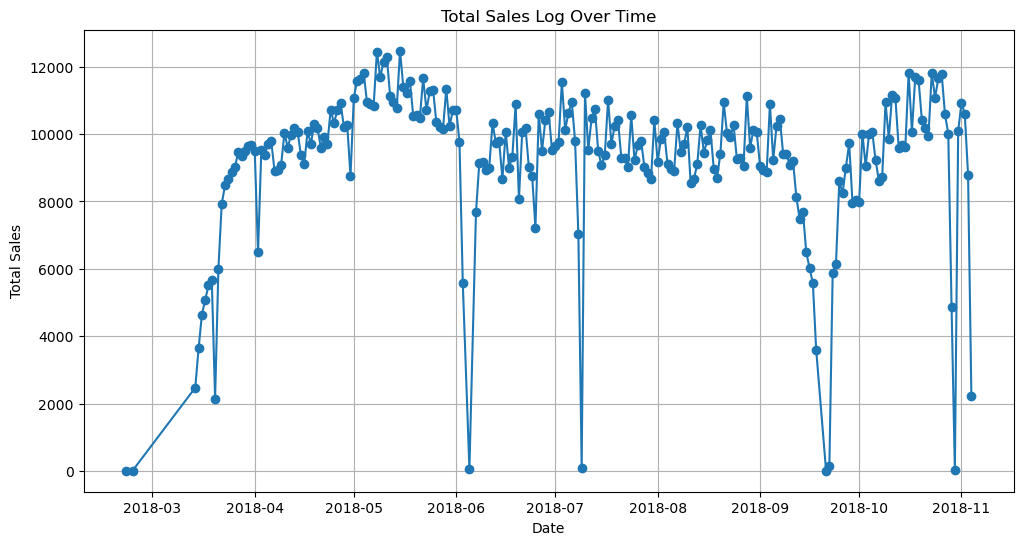

In [225]:
# Plot total sales over time
plt.figure(figsize=(12, 6))
plt.plot(df_ts, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Log Over Time')
plt.grid(True)
plt.show()


## Check ADF

ADF Statistic: -3.786899286055764
P-value: 0.003044232731325086
Critical Values:
   1%: -3.4596204846395824
   5%: -2.8744153028455948
   10%: -2.5736320761218576


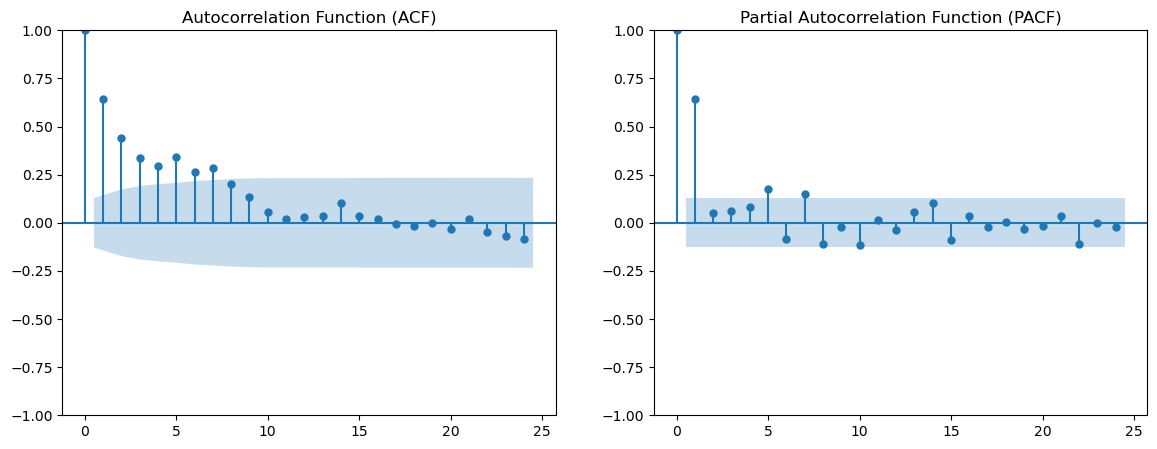

In [159]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Perform ADF test
adf_test = adfuller(df_ts['total_sales_log'])

# Print test results
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"   {key}: {value}")

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot (used to determine 'q' in ARIMA)
plot_acf(df_ts['total_sales_log'], ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot (used to determine 'p' in ARIMA)
plot_pacf(df_ts['total_sales_log'], ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


0.003<0.05 So the data is stationary. However, P-value = 0.0030 (Below 0.05, but not very strong) I want use differenced d=1

ADF Statistic after differencing: -7.2723557026197865
P-value after differencing: 1.5763198283569212e-10
Critical Values:
   1%: -3.4596204846395824
   5%: -2.8744153028455948
   10%: -2.5736320761218576


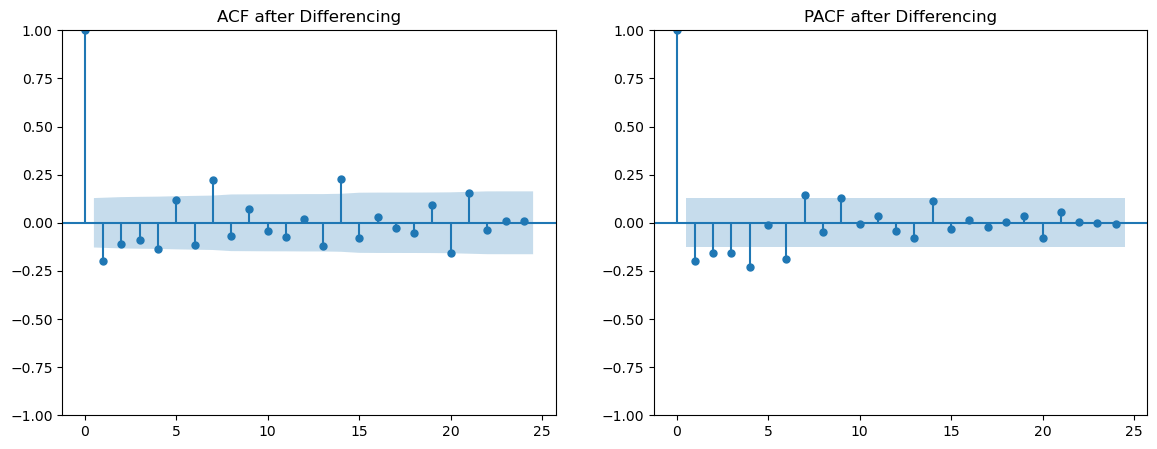

In [227]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First-order differencing (d=1)
df_ts_diff = df_ts['total_sales_log'].diff().dropna()

# Perform ADF test on differenced data
adf_test_diff = adfuller(df_ts_diff)

# Print test results
print(f"ADF Statistic after differencing: {adf_test_diff[0]}")
print(f"P-value after differencing: {adf_test_diff[1]}")
print("Critical Values:")
for key, value in adf_test_diff[4].items():
    print(f"   {key}: {value}")

# Plot ACF and PACF after differencing
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(df_ts_diff, ax=axes[0])
axes[0].set_title("ACF after Differencing")

plot_pacf(df_ts_diff, ax=axes[1])
axes[1].set_title("PACF after Differencing")

plt.show()


分test train index

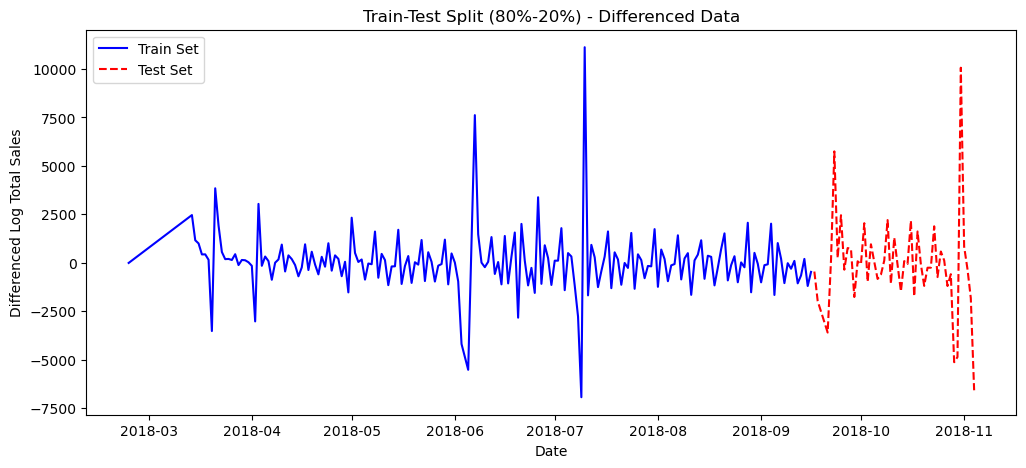

(186, 47)

In [235]:
# Ensure df_ts_diff is properly defined
df_ts_diff = df_ts.diff().dropna()

# 1) Define the train-test split ratio (80% train, 20% test)
train_ratio = 0.8
split_index = int(len(df_ts_diff) * train_ratio)

# 2) Split df_ts_diff into train and test sets
train_data = df_ts_diff.iloc[:split_index].copy()
test_data = df_ts_diff.iloc[split_index:].copy()

# 3) Print sizes of each set
train_size = len(train_data)
test_size = len(test_data)

# 4) Plot the train and test sets for visualization
plt.figure(figsize=(12, 5))
plt.plot(train_data['total_sales_log'], label='Train Set', color='blue')
plt.plot(test_data['total_sales_log'], label='Test Set', color='red', linestyle='--')
plt.title("Train-Test Split (80%-20%) - Differenced Data")
plt.xlabel("Date")
plt.ylabel("Differenced Log Total Sales")
plt.legend()
plt.show()

train_size, test_size


Training set length: 187
Testing set length:  47


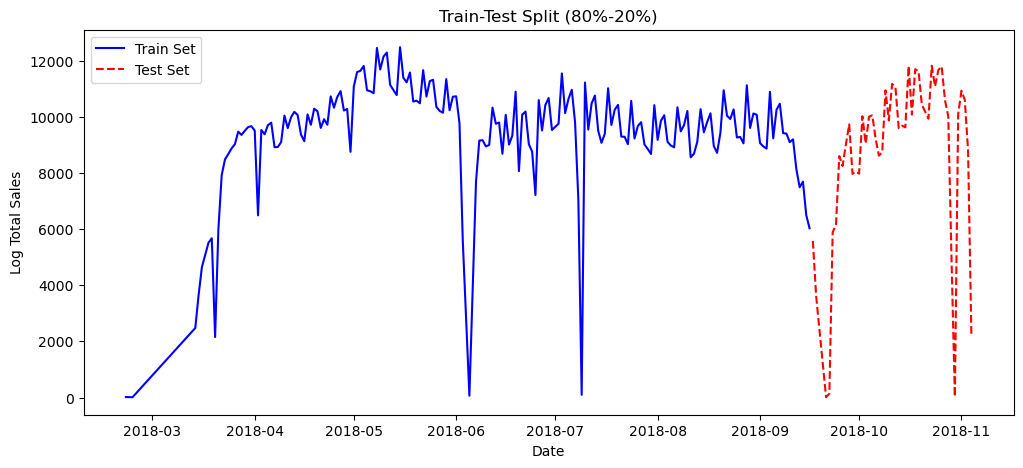

In [161]:
import matplotlib.pyplot as plt

# 1) Define the train-test split ratio (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
split_index = int(len(df_ts) * train_ratio)

# 2) Split df_ts into train and test sets
train_data = df_ts.iloc[:split_index].copy()
test_data  = df_ts.iloc[split_index:].copy()

# 3) Print sizes of each set
print(f"Training set length: {len(train_data)}")
print(f"Testing set length:  {len(test_data)}")

# 4) Plot the train and test sets for clarity (optional)
plt.figure(figsize=(12,5))
plt.plot(train_data['total_sales_log'], label='Train Set', color='blue')
plt.plot(test_data['total_sales_log'], label='Test Set', color='red', linestyle='--')
plt.title("Train-Test Split (80%-20%)")
plt.xlabel("Date")
plt.ylabel("Log Total Sales")
plt.legend()
plt.show()


In [237]:
# Import necessary libraries
from pmdarima import auto_arima

# Run auto_arima to find the best (p,d,q) values with d=1 (since differencing is needed)
best_arima_model = auto_arima(
    df_ts_diff,  # Differenced data
    seasonal=False,  # No clear seasonality detected
    stepwise=True,  # Faster model selection
    trace=True,  # Show model selection process
    suppress_warnings=True  # Suppress warnings for cleaner output
)

# Print the summary of the best ARIMA model
best_arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4131.210, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4162.822, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4155.002, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4147.521, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4135.089, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4134.929, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=4132.276, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4133.267, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4133.912, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4133.587, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4134.620, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=4131.850, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4132.980, Time=0.27 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 2.500 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  233
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2060.605
Date:                Wed, 05 Mar 2025   AIC                           4131.210
Time:                        16:41:33   BIC                           4148.465
Sample:                             0   HQIC                          4138.168
                                - 233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4563      0.137     -3.330      0.001      -0.725      -0.188
ar.L2          0.3056      0.107      2.855      0.004       0.096       0.515
ma.L1          0.1388      0.124      1.115      0.265      -0.105       0.383
ma.L2         -0.7324      0.109     -6.712      0.000      -0.946      -0.519
sigma2      2.765e+06   1.31e+05     21.145      0.000    2.51e+06    3.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               547.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

auto_arima 用 train

In [155]:
from pmdarima import auto_arima

# Use auto_arima on the training set
best_model = auto_arima(
    train_data['total_sales_log'],  # your target time series column
    seasonal=False,                 # non-seasonal time series
    stepwise=True,                  # stepwise search for best (p,d,q)
    suppress_warnings=True,         # ignore harmless warnings
    trace=True                      # show the search process in console
)

# Print the model summary
print(best_model.summary())

# Extract (p, d, q) from the best model
best_p, best_d, best_q = best_model.order
print(f"Best ARIMA order based on AIC: ARIMA({best_p}, {best_d}, {best_q})")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3268.318, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3961.412, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3297.931, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3745.505, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3267.440, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3270.928, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3269.279, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3267.382, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3282.322, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3269.286, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3268.055, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3279.9

## Best model:  ARIMA(2,0,1)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

                               SARIMAX Results                                
Dep. Variable:        total_sales_log   No. Observations:                  186
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1618.938
Date:                Wed, 05 Mar 2025   AIC                           3247.876
Time:                        16:42:05   BIC                           3263.978
Sample:                             0   HQIC                          3254.402
                                - 186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1551      0.177     -6.540      0.000      -1.501      -0.809
ar.L2         -0.3572      0.066     -5.378      0.000      -0.487      -0.227
ma.L1         -0.1424      0.171     -0.831      0.4

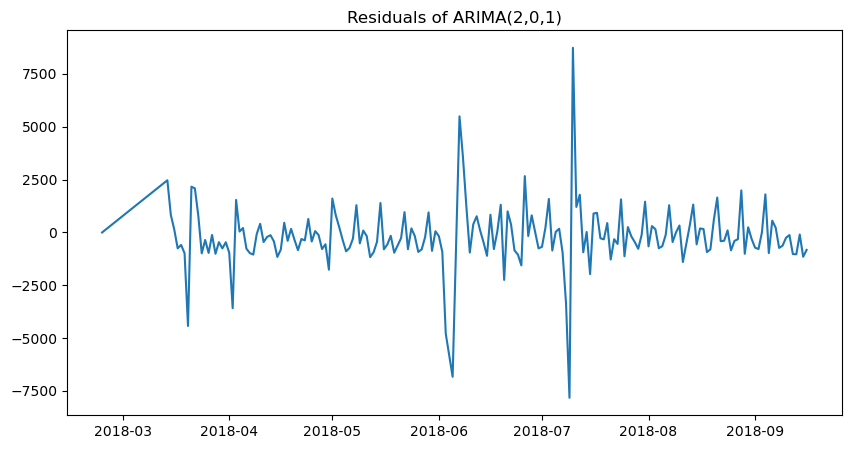

In [239]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Train ARIMA(2,0,1) model
model = ARIMA(train_data['total_sales_log'], order=(2,1,2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot residuals
plt.figure(figsize=(10,5))
plt.plot(model_fit.resid)
plt.title("Residuals of ARIMA(2,0,1)")
plt.show()


In [144]:
也用train test先训练 在预测  focus data

SyntaxError: invalid syntax (370314044.py, line 1)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


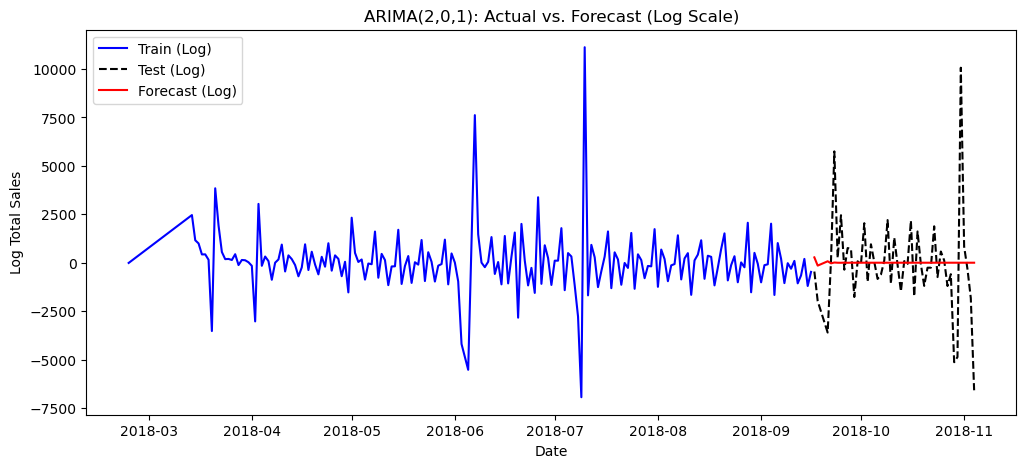

Test RMSE (Log scale): 2502.208864095758


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 3) Forecast for the same length as the test set
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# 4) Create a forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': test_data.index,
    'Predicted Log Sales': forecast.values
})

# Convert predicted log values to original scale
forecast_df['Predicted Sales'] = np.exp(forecast_df['Predicted Log Sales'])

# Set Date as index
forecast_df.set_index('Date', inplace=True)

# 5) Plot actual vs. predicted (on log scale for clarity)
plt.figure(figsize=(12,5))
plt.plot(train_data, label='Train (Log)', color='blue')
plt.plot(test_data, label='Test (Log)', color='black', linestyle='--')
plt.plot(forecast_df['Predicted Log Sales'], label='Forecast (Log)', color='red')
plt.title("ARIMA(2,0,1): Actual vs. Forecast (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Total Sales")
plt.legend()
plt.show()

# 6) Evaluate using RMSE on log scale
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Test RMSE (Log scale): {rmse}")


准确性

In [151]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1) RMSE on the log scale
rmse_log = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Test RMSE (Log Scale): {rmse_log}")

# 2) MAE on the log scale
mae_log = mean_absolute_error(test_data, forecast)
print(f"Test MAE (Log Scale): {mae_log}")




Test RMSE (Log Scale): 3017.6812512135502
Test MAE (Log Scale): 2426.8819651409744


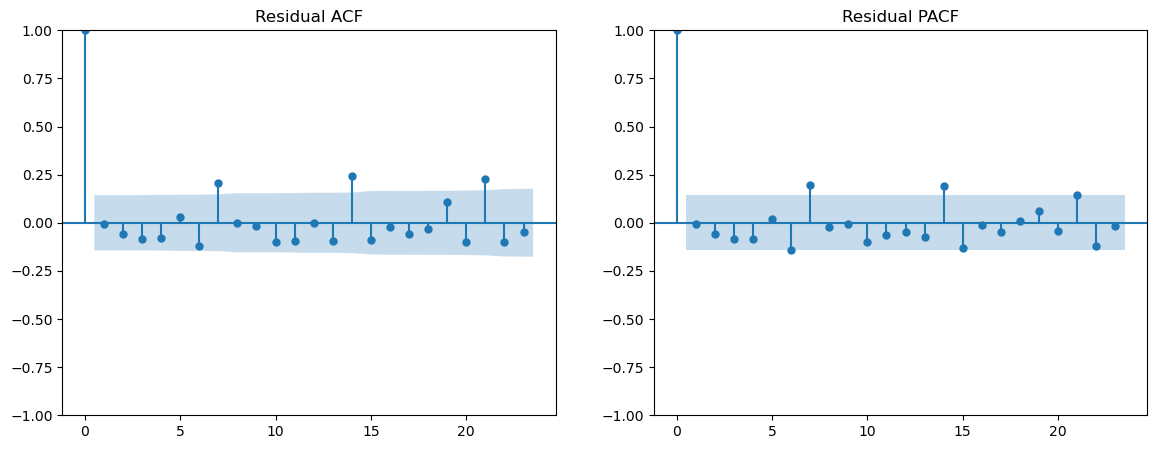

In [165]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(model_fit.resid, ax=axes[0])
axes[0].set_title("Residual ACF")

plot_pacf(model_fit.resid, ax=axes[1])
axes[1].set_title("Residual PACF")

plt.show()


## SARIMA

In [167]:
# If not installed, run:
# !pip install pmdarima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error


In [ ]:
seasonal_period = 7  # Example: weekly seasonality, or 12 for monthly


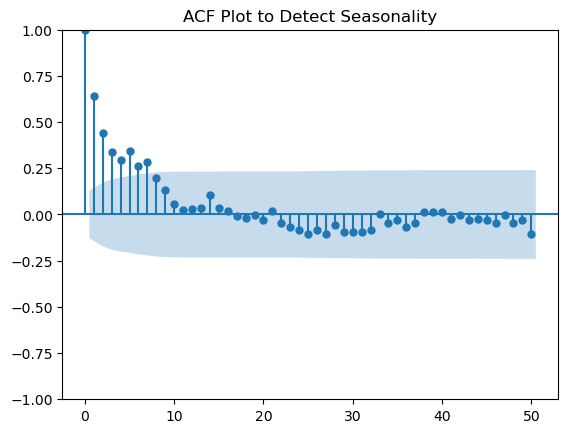

In [169]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for the original total_sales_log series
plot_acf(df_ts['total_sales_log'], lags=50)
plt.title("ACF Plot to Detect Seasonality")
plt.show()


In [196]:
seasonal_period = 3  # Example: weekly seasonality, or 12 for monthly


In [198]:
split_ratio = 0.8
split_index = int(len(df_ts) * split_ratio)

train_data = df_ts['total_sales_log'].iloc[:split_index]
test_data  = df_ts['total_sales_log'].iloc[split_index:]


In [200]:
# Use seasonal=True and set m=seasonal_period
auto_sarima_model = auto_arima(
    train_data,
    seasonal=True,               # Turn on seasonality
    m=seasonal_period,           # Seasonal period (7, 12, etc.)
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    max_p=3, max_q=3,            # Limit overfitting
    max_P=3, max_Q=3,            # Seasonal AR and MA terms
    max_order=None               # Avoid extremely large orders
)

print(auto_sarima_model.summary())

# Extract best (p,d,q) and (P,D,Q,m)
best_p, best_d, best_q = auto_sarima_model.order
best_P, best_D, best_Q, best_m = auto_sarima_model.seasonal_order
print(f"Best SARIMA order: ARIMA({best_p},{best_d},{best_q}) x ({best_P},{best_D},{best_Q},{best_m})")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=3393.387, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=3282.287, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=3315.657, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=3961.412, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[3] intercept   : AIC=3280.483, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[3] intercept   : AIC=3280.941, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[3] intercept   : AIC=3279.174, Time=0.28 sec
 ARIMA(1,0,0)(2,0,1)[3] intercept   : AIC=3281.027, Time=0.85 sec
 ARIMA(1,0,0)(1,0,2)[3] intercept   : AIC=3280.385, Time=0.42 sec
 ARIMA(1,0,0)(0,0,2)[3] intercept   : AIC=3281.770, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[3] intercept   : AIC=3281.072, Time=0.42 sec
 ARIMA(1,0,0)(2,0,2)[3] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(1,0,1)[3] intercept   : AIC=3371.925, Time=0.51 sec
 ARIMA(2,0,0)(1,0,1)[3] intercept   : AIC=i

In [204]:
sarima_model = SARIMAX(
    train_data,
    order=(2, 0, 1),
    seasonal_order=(1, 0, 1, 3),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit()
print(sarima_fit.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58711D+00    |proj g|=  8.38206D-01

At iterate    5    f=  8.44438D+00    |proj g|=  1.79227D+00

At iterate   10    f=  8.42925D+00    |proj g|=  5.46123D-02

At iterate   15    f=  8.42877D+00    |proj g|=  4.42805D-02

At iterate   20    f=  8.42814D+00    |proj g|=  5.25282D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     35      1     0     0   5.431D-03   8.428D+00
  F =   8.4279365960039030     

CONVERG

In [206]:
# Forecast the same number of steps as the test set length
forecast_steps = len(test_data)
forecast = sarima_fit.forecast(steps=forecast_steps)

# Create a forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': test_data.index,
    'Forecasted Log Sales': forecast.values
})
forecast_df.set_index('Date', inplace=True)

# Convert from log scale to original sales
forecast_df['Forecasted Sales'] = np.exp(forecast_df['Forecasted Log Sales'])


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


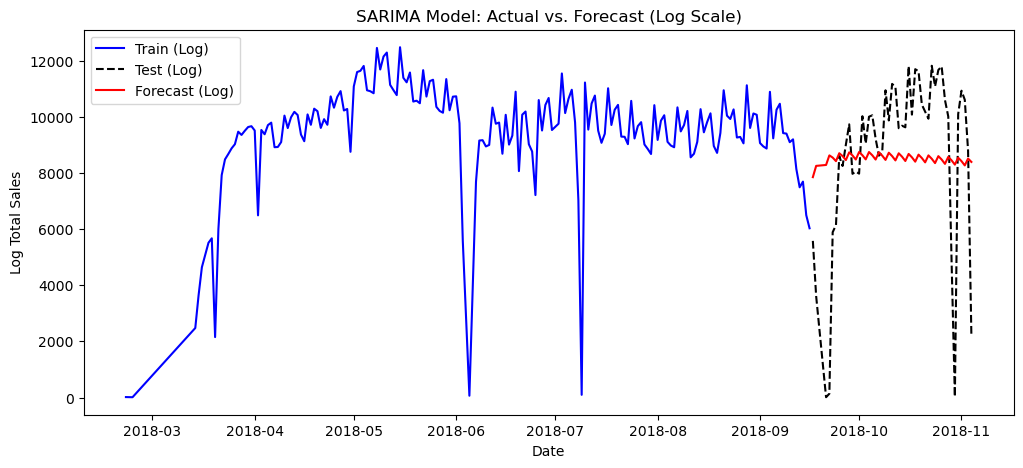

RMSE on log scale: 3033.582470083961


In [208]:
plt.figure(figsize=(12,5))
plt.plot(train_data, label='Train (Log)', color='blue')
plt.plot(test_data, label='Test (Log)', color='black', linestyle='--')
plt.plot(forecast_df['Forecasted Log Sales'], label='Forecast (Log)', color='red')
plt.title("SARIMA Model: Actual vs. Forecast (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Total Sales")
plt.legend()
plt.show()

# Calculate RMSE on log scale
rmse_log = np.sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE on log scale: {rmse_log}")
